# Structure of v-GeO2 along the glass transition



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sci
from scipy.signal import find_peaks,peak_widths
import math

In [2]:
def get_indices_in_range(lst, start, end):
    """
    Returns a new list containing only the indices of the values within the given range (inclusive).
    """
    return [i for i, x in enumerate(lst) if start <= x <= end]

def read_dat_file(filename):
    data = np.loadtxt(filename+'.dat',encoding='utf-8-sig')
    col = []
    num = len(data.transpose())
    for i in range(num):
        if num == len(data):
            col1 = data[i]
        else:
            col1 = data[:,i]
        col.append(col1)

    return col


def steps_to_angle(steps):
    angle = steps*128/640 - 2.8  # max angle / n of channels
    return angle

def steps_to_q(steps):
    angle = steps*128/640 - 2.8
    q = 4*np.pi*np.sin(angle*np.pi/360)/0.729   # in Angstrom inversi
    return q

def my_round(x,dx):      # per avere dato + errore con le giuste cire significative (incertezza con una sola cifra significativa)  ---> da sistemare,quando dx salta di cifra x resta arrotondato a cifra sotto
    round_x = []
    if np.size(x) > 1:
        for i in range(np.size(x)):
            if dx[i] < 1:
                dist = -int(np.log10(dx[i])-1)
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx[i]))
                dx_new =  round(dx[i],dist)
                x_new = round(x[i],-int(np.log10(dx_new)))
            round_x.append([x_new,dx_new])
    else:
            if dx < 1:
                dist = -int(np.log10(dx)-1)
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)-1))
            else:
                dist = -int(np.log10(dx))
                dx_new =  round(dx,dist)
                x_new = round(x,-int(np.log10(dx_new)))
            round_x.append([x_new, dx_new])
    return round_x

Import raw data: scattered intensities at diferent temperatures

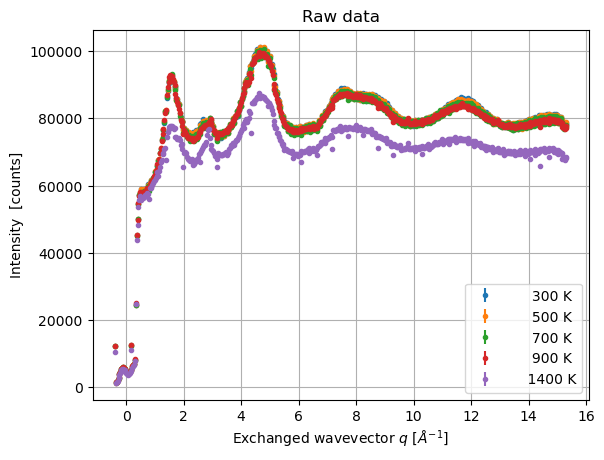

Minimum distance that can be proved: 0.4105583278938101 Å


In [3]:

lamda = 0.729  # Angstrom
T = np.array([300, 500, 700, 900, 1400]) # K

file_name = ['sample_300', 'sample_500K','sample_700K', 'sample_900K', 'sample_1400']

channel = read_dat_file('sample_300')[0]
#two_theta= steps_to_angle(channel)
q = steps_to_q(channel)

data_raw = []
err_data_raw = []

#q = []

for i in range(np.size(file_name)):
    #q.append(steps_to_q(read_dat_file(file_name[i])[0]))
    data_raw.append(read_dat_file(file_name[i])[1])
    err_data_raw.append(read_dat_file(file_name[i])[2])
   
    #plt.errorbar(two_theta,data_raw[i], fmt = '.', yerr = err_data_raw[i] ,label = '%8.0f K' % T[i])
    plt.errorbar(q,data_raw[i], fmt = '.', yerr = err_data_raw[i] ,label = '%8.0f K' % T[i])
#plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Raw data')
plt.grid()
plt.legend()
plt.show()

print('Minimum distance that can be proved:',2*np.pi/max(q),'Å')

Data good from channel 30

Import vanadium and cadmium

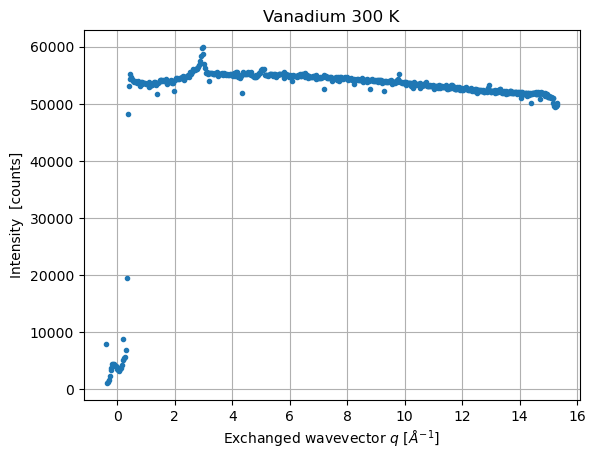

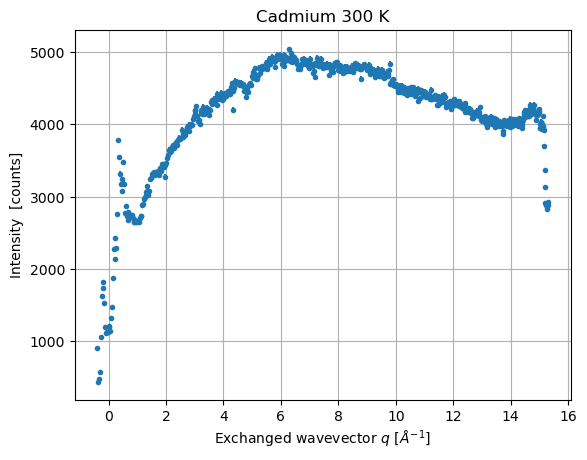

In [4]:
q_v = steps_to_q(read_dat_file('vanadium_300K')[0])
I_v_raw = read_dat_file('vanadium_300K')[1]
err_I_v_raw = read_dat_file('vanadium_300K')[2]

q_cd = steps_to_q(read_dat_file('cadmium_300K')[0])
I_cd = read_dat_file('cadmium_300K')[1]
err_I_cd = read_dat_file('cadmium_300K')[2]

plt.errorbar(q_v,I_v_raw, fmt = '.', yerr = err_I_v_raw,label = 'Data Vanadium 300 K')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Vanadium 300 K')
plt.grid()
#plt.legend()
plt.show()

plt.errorbar(q_cd,I_cd, fmt = '.', yerr = err_I_cd,label = 'Data Cadmium 300 K')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Cadmium 300 K')
plt.grid()
#plt.legend()
plt.show()

Import emty cell and empty furnace

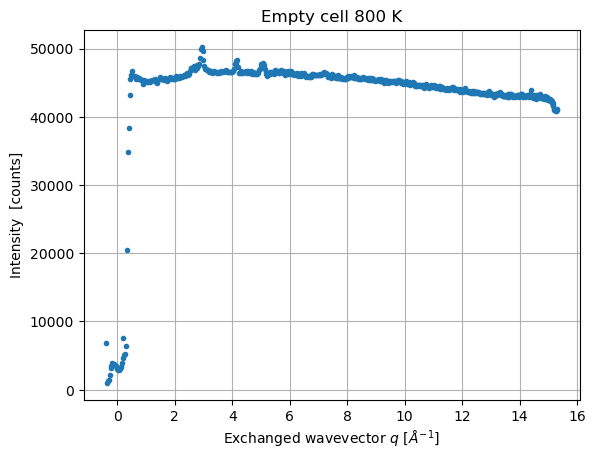

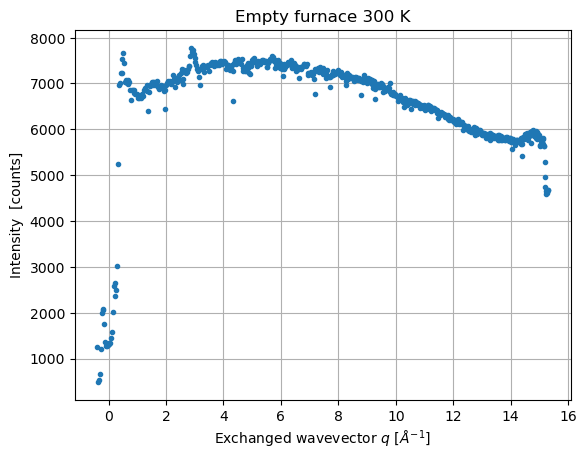

In [5]:
q_empty_cell = steps_to_q(read_dat_file('emptycell_800K')[0])
I_empty_cell = read_dat_file('emptycell_800K')[1]
err_I_empty_cell= read_dat_file('emptycell_800K')[2]

q_empty_furnace = steps_to_q(read_dat_file('emptyfurnace_300K')[0])
I_empty_furnace = read_dat_file('emptyfurnace_300K')[1]
err_I_empty_furnace= read_dat_file('emptyfurnace_300K')[2]

plt.errorbar(q_empty_cell,I_empty_cell, fmt = '.', yerr = err_I_empty_cell,label = 'Data empty cell 800 K')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Empty cell 800 K')
plt.grid()
#plt.legend()
plt.show()

plt.errorbar(q_empty_furnace,I_empty_furnace, fmt = '.', yerr = err_I_empty_furnace,label = 'Data empty furnace 300 K')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Empty furnace 300 K')
plt.grid()
#plt.legend()
plt.show()

Find background intensities

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


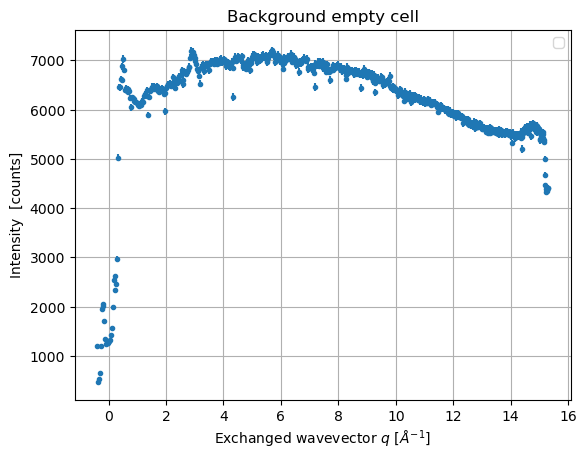

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


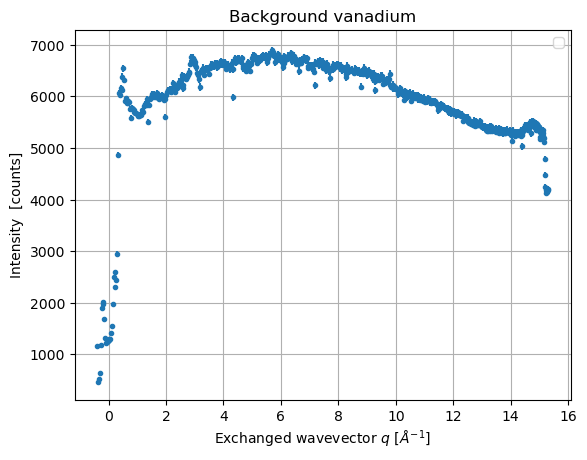

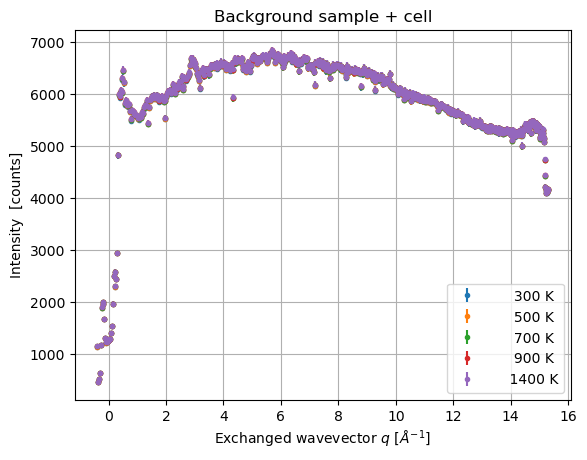

In [6]:
#background empty cell
trasb_cell = read_dat_file('trasb_cell')[1]  # 300 K

I_back_cell = I_cd + trasb_cell*(I_empty_furnace-I_cd)
err_I_back_cell = np.sqrt(((1+trasb_cell)*err_I_cd)**2+(err_I_empty_furnace*trasb_cell)**2)

plt.errorbar(q,I_back_cell, fmt = '.', yerr = err_I_back_cell )
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Background empty cell')
plt.grid()
plt.legend()
plt.show()

#background vanadium
trasb_v = read_dat_file('trasb_vana')[1]  # 300 K

I_back_v = I_cd + trasb_v*(I_empty_furnace-I_cd)
err_I_back_v = np.sqrt(((1+trasb_v)*err_I_cd)**2+(err_I_empty_furnace*trasb_v)**2)

plt.errorbar(q,I_back_v, fmt = '.', yerr = err_I_back_v )
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Background vanadium')
plt.grid()
plt.legend()
plt.show()

#background sample + cell
trasb_sample = read_dat_file('trasb_sample')[1]  # all T

I_back_sample = []
err_I_back_sample = []

for i in range(np.size(T)):
    I = I_cd + trasb_sample[i]*(I_empty_furnace-I_cd)
    err_I = np.sqrt(((1+trasb_sample[i])*err_I_cd)**2+(err_I_empty_furnace*trasb_sample[i])**2)
    I_back_sample.append(I)
    err_I_back_sample.append(err_I)
    plt.errorbar(q,I_back_sample[i], fmt = '.', yerr = err_I_back_sample[i] ,label = '%8.0f K' % T[i])
#plt.xlabel(r'Scattering angle $2 \theta$ [$^{\circ}$]')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Background sample + cell')
plt.grid()
plt.legend()
plt.show()

Subtract background

#### GAMMA #####
#### Sample #####
#####      300  K ######
Fit to quadratic function aq^2+bq+c
a 5e-06 +/- 2e-07
b -1e-05 +/- 3e-06
c 0.042505 +/- 1e-05
0.04250466999565099 1.0274834267762456e-05
Chi square 7.181906880111532
#####      500  K ######
Fit to quadratic function aq^2+bq+c
a 4.9e-06 +/- 2e-07
b -9e-06 +/- 3e-06
c 0.042587 +/- 1e-05
0.04258725333534232 9.820050964061922e-06
Chi square 6.56014803101368
#####      700  K ######
Fit to quadratic function aq^2+bq+c
a 4.8e-06 +/- 2e-07
b -9e-06 +/- 3e-06
c 0.042675 +/- 1e-05
0.042674682752828035 1.0924157303125194e-05
Chi square 8.118688396421401
#####      900  K ######
Fit to quadratic function aq^2+bq+c
a 4.72e-06 +/- 1e-07
b -9e-06 +/- 2e-06
c 0.042792 +/- 7e-06
0.04279198656118169 7.406963609186794e-06
Chi square 3.7321871397670443
#####     1400  K ######
Fit to quadratic function aq^2+bq+c
a 4.62e-06 +/- 1e-07
b -8e-06 +/- 2e-06
c 0.04282 +/- 9e-06
0.042819569134899156 8.581811038958379e-06
Chi square 5.010144108060025


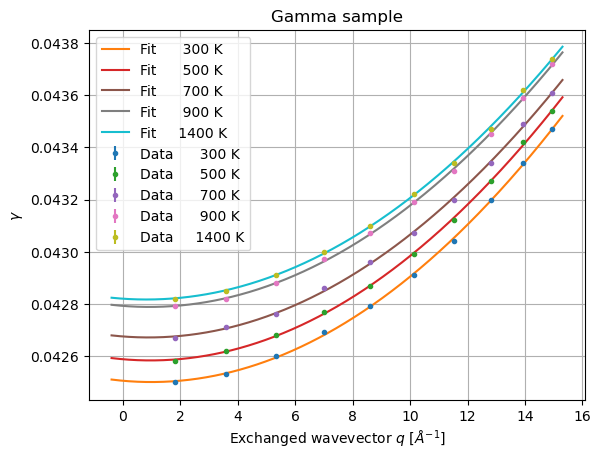

#### Cell #####
Fit to quadratic function aq^2+bq+c
a -5e-07 +/- 2e-07
b 1.6e-05 +/- 3e-06
c 0.049022 +/- 1e-05
Chi square 9.00706648466171


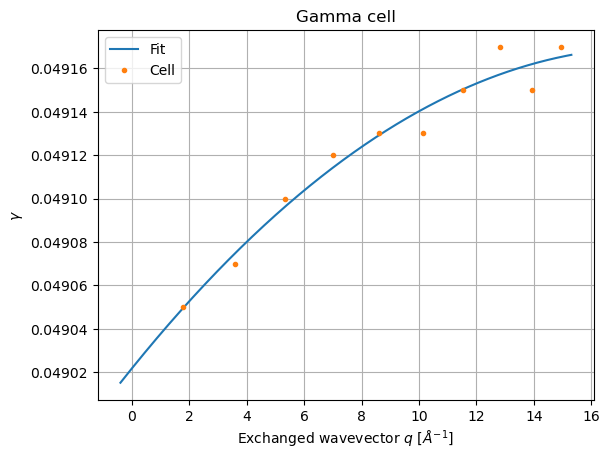

##### M ######
#### Sample #####
#####      300  K ######
Fit to quadratic function aq^2+bq+c
a -2.7e-06 +/- 1e-06
b -3e-05 +/- 2e-05
c 0.25119 +/- 6e-05
Chi square 2.6645966872969615
#####      500  K ######
Fit to quadratic function aq^2+bq+c
a -2.7e-06 +/- 1e-06
b -3e-05 +/- 2e-05
c 0.24949 +/- 6e-05
Chi square 2.664596686759275
#####      700  K ######
Fit to quadratic function aq^2+bq+c
a -2.2e-06 +/- 1e-06
b -3e-05 +/- 2e-05
c 0.24779 +/- 8e-05
Chi square 4.1073792121112325
#####      900  K ######
Fit to quadratic function aq^2+bq+c
a -1.2e-06 +/- 1e-06
b -4e-05 +/- 2e-05
c 0.24553 +/- 7e-05
Chi square 2.9043018467676314
#####     1400  K ######
Fit to quadratic function aq^2+bq+c
a -2.7e-06 +/- 4e-07
b -1.8e-05 +/- 6e-06
c 0.24486 +/- 2e-05
Chi square 0.35403757044174083


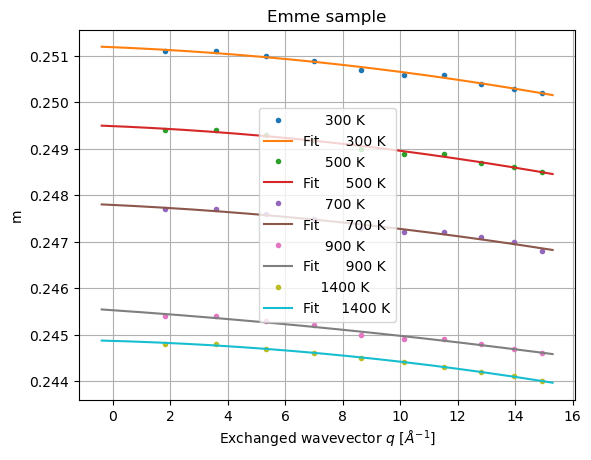

#### Vanadium #####
Fit to quadratic function aq^2+bq+c
a -5.1e-06 +/- 6e-07
b 2.7e-05 +/- 1e-05
c 0.13886 +/- 4e-05
Chi square 1.1260345477390283


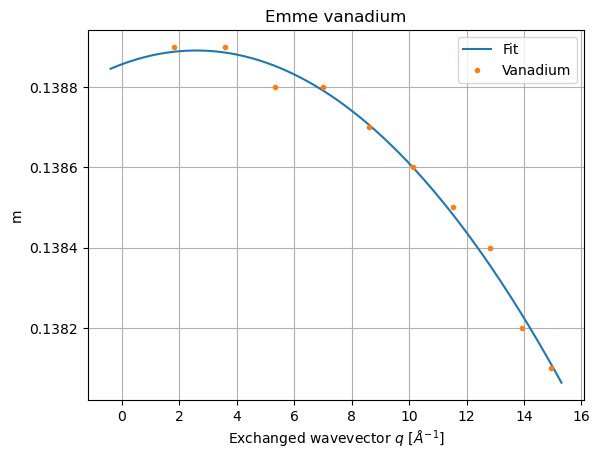

#### Sample correct #####
#####      300  K ######
Fit to quadratic function aq^2+bq+c
a 0.000109 +/- 4e-06
b -0.00049 +/- 6e-05
c 0.8671 +/- 0.0002
0.8670559219373438 0.0002283945401221437
Chi square 3548.644949013051
#####      500  K ######
Fit to quadratic function aq^2+bq+c
a 0.000108 +/- 5e-06
b -0.00048 +/- 8e-05
c 0.8687 +/- 0.0003
0.8687405976817718 0.00029820539039113376
Chi square 6049.557537509644
#####      700  K ######
Fit to quadratic function aq^2+bq+c
a 0.000105 +/- 5e-06
b -0.00046 +/- 9e-05
c 0.8705 +/- 0.0003
0.8705242653074535 0.0003234828787334751
Chi square 7118.666367938014
#####      900  K ######
Fit to quadratic function aq^2+bq+c
a 0.000104 +/- 4e-06
b -0.00047 +/- 7e-05
c 0.8729 +/- 0.0003
0.8729172094876366 0.0002622605929377076
Chi square 4679.036944919457
#####     1400  K ######
Fit to quadratic function aq^2+bq+c
a 0.000102 +/- 5e-06
b -0.00044 +/- 9e-05
c 0.8735 +/- 0.0003
0.8734800203833009 0.0003301384660302148
Chi square 7414.554374538717


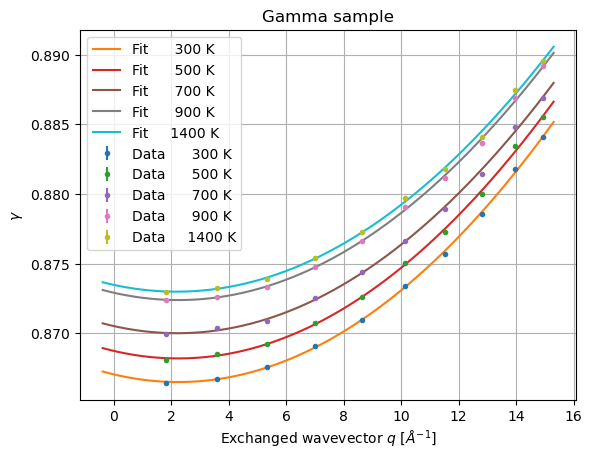

In [7]:
print('#### GAMMA #####')
gamma = read_dat_file('gamma')    # manca incertezza su questi valori
theta_gamma = gamma[0]
q_gamma = 4*np.pi*np.sin(theta_gamma*np.pi/360)/lamda
gamma_sample = gamma[1:6]
gamma_cella = gamma[6]
gamma_v = gamma[7]

err_ris_gamma = 1e-5/np.sqrt(12)*np.ones(np.size(q_gamma))

gamma = gamma_sample/gamma_cella

def quadratic(x,a,b,c):
    return a*x**2+b*x+c

def exp_decay(x,a,b,c):
    return a + b*np.exp(-2*x/c)

print('#### Sample #####')

gamma_sample_fit = []

for i in range(np.size(T)):
    print('##### %8.0f  K ######' % T[i])
    popt,pcov = curve_fit(quadratic,q_gamma,gamma_sample[i],sigma = err_ris_gamma)
    gamma_sample_fit.append(quadratic(q,*popt))
    chi_sq = np.sum((gamma_sample[i]-quadratic(q_gamma, *popt))**2/err_ris_gamma**2)/(np.size(gamma_sample[i])-3)   
    print('Fit to quadratic function aq^2+bq+c')
    par = my_round(popt,np.sqrt(np.diag(pcov)))
    print('a', par[0][0], '+/-', par[0][1])
    print('b', par[1][0], '+/-', par[1][1])
    print('c', par[2][0], '+/-', par[2][1])
    print(popt[2],np.sqrt(pcov[2][2]))
    print('Chi square', chi_sq)
    plt.errorbar(q_gamma,gamma_sample[i],yerr=err_ris_gamma,fmt = '.',label = 'Data %8.0f K' % T[i])
    plt.plot(q,gamma_sample_fit[i],label = 'Fit %8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'$\gamma$')
plt.title('Gamma sample')
plt.grid()
plt.legend()
plt.show()

print('#### Cell #####')
popt,pcov = curve_fit(quadratic,q_gamma,gamma_cella,sigma = err_ris_gamma)
gamma_cella_fit=quadratic(q,*popt)
chi_sq = np.sum((gamma_cella-quadratic(q_gamma, *popt))**2/err_ris_gamma**2)/(np.size(gamma_cella)-3)
print('Fit to quadratic function aq^2+bq+c')
par = my_round(popt,np.sqrt(np.diag(pcov)))
print('a', par[0][0], '+/-', par[0][1])
print('b', par[1][0], '+/-', par[1][1])
print('c', par[2][0], '+/-', par[2][1])
print('Chi square', chi_sq)
plt.plot(q,gamma_cella_fit,label = 'Fit')
plt.plot(q_gamma,gamma_cella, '.',label = 'Cell')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'$\gamma$')
plt.title('Gamma cell')
plt.grid()
plt.legend()
plt.show()

print('##### M ######')
m = read_dat_file('emme')
theta_m = m[0]
q_m = 4*np.pi*np.sin(theta_m*np.pi/360)/lamda
m_sample =m[1:6]
m_cella = m[6]
m_v = m[7]


err_ris_m = 1e-4/np.sqrt(12)*np.ones(np.size(q_m))

print('#### Sample #####')
m_sample_fit = []
for i in range(np.size(T)):
    print('##### %8.0f  K ######' % T[i])
    popt,pcov = curve_fit(quadratic,q_m,m_sample[i],sigma = err_ris_m)
    m_sample_fit.append(quadratic(q,*popt))
    chi_sq = np.sum((m_sample[i]-quadratic(q_m, *popt))**2/err_ris_m**2)/(np.size(m_sample[i])-3)
    print('Fit to quadratic function aq^2+bq+c')
    par = my_round(popt,np.sqrt(np.diag(pcov)))
    print('a', par[0][0], '+/-', par[0][1])
    print('b', par[1][0], '+/-', par[1][1])
    print('c', par[2][0], '+/-', par[2][1])
    print('Chi square', chi_sq)
    plt.plot(q_m,m_sample[i], '.',label = '%8.0f K' % T[i])
    plt.plot(q,m_sample_fit[i],label = 'Fit %8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('m')
plt.title('Emme sample')
plt.grid()
plt.legend()
plt.show()

print('#### Vanadium #####')
popt,pcov = curve_fit(quadratic,q_m,m_v,sigma = err_ris_m)
m_v_fit=quadratic(q,*popt)
chi_sq = np.sum((m_v-quadratic(q_m, *popt))**2/err_ris_m**2)/(np.size(m_v)-3)
print('Fit to quadratic function aq^2+bq+c')
par = my_round(popt,np.sqrt(np.diag(pcov)))
print('a', par[0][0], '+/-', par[0][1])
print('b', par[1][0], '+/-', par[1][1])
print('c', par[2][0], '+/-', par[2][1])
print('Chi square', chi_sq)
plt.plot(q,m_v_fit,label = 'Fit')
plt.plot(q_m,m_v, '.',label = 'Vanadium')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('m')
plt.title('Emme vanadium')
plt.grid()
plt.legend()
plt.show()


print('#### Sample correct #####')

gamma_sample_fit = []

for i in range(np.size(T)):
    print('##### %8.0f  K ######' % T[i])
    popt,pcov = curve_fit(quadratic,q_gamma,gamma[i],sigma = err_ris_gamma)
    gamma_sample_fit.append(quadratic(q,*popt))
    chi_sq = np.sum((gamma[i]-quadratic(q_gamma, *popt))**2/err_ris_gamma**2)/(np.size(gamma[i])-3)   
    print('Fit to quadratic function aq^2+bq+c')
    par = my_round(popt,np.sqrt(np.diag(pcov)))
    print('a', par[0][0], '+/-', par[0][1])
    print('b', par[1][0], '+/-', par[1][1])
    print('c', par[2][0], '+/-', par[2][1])
    print(popt[2],np.sqrt(pcov[2][2]))
    print('Chi square', chi_sq)
    plt.errorbar(q_gamma,gamma[i],yerr=err_ris_gamma,fmt = '.',label = 'Data %8.0f K' % T[i])
    plt.plot(q,gamma_sample_fit[i],label = 'Fit %8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'$\gamma$')
plt.title('Gamma sample')
plt.grid()
plt.legend()
plt.show()

Calculate the intensity form single scattering processes from the sample

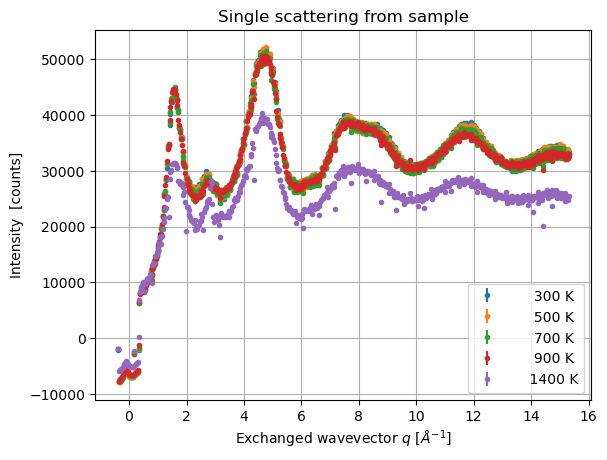

In [8]:
I_s = []
err_I_s= []
init = 600  # make the average over highest q values to approx lim q --> infty
fin = 640

for i in range(np.size(T)):
    I_m = np.mean(m_sample_fit[i][init:fin]/(m_sample_fit[i][init:fin]+1)*(data_raw[i][init:fin]-I_back_sample[i][init:fin] - gamma_sample_fit[i][init:fin]*(I_empty_cell[init:fin]-I_back_cell[init:fin])))
    err_I_m = 1/(fin-init)*np.sqrt(np.sum((m_sample_fit[i][init:fin]**2/(m_sample_fit[i][init:fin]+1)**2*(err_data_raw[i][init:fin]**2+err_I_back_sample[i][init:fin]**2 + gamma_sample_fit[i][init:fin]**2*(err_I_empty_cell[init:fin]**2+err_I_back_cell[init:fin]**2)))))

    data = data_raw[i] - I_back_sample[i] - gamma_sample_fit[i]*(I_empty_cell-I_back_cell) - I_m
    err_data = np.sqrt(err_data_raw[i]**2+err_I_back_sample[i]**2+gamma_sample_fit[i]**2*(err_I_empty_cell[i]**2+err_I_back_cell[i]**2)+err_I_m**2)

    I_s.append(data)
    err_I_s.append(err_data)
    
    plt.errorbar(q,I_s[i], fmt = '.', yerr = err_data ,label = '%8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Single scattering from sample')
plt.grid()
plt.legend()
plt.show()

Vanadium

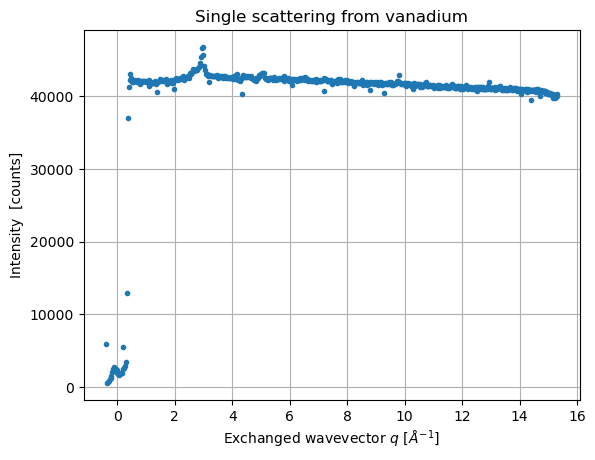

In [9]:
I_v = I_v_raw - I_back_v - m_v_fit/(m_v_fit+1)*(I_v_raw-I_back_v)
err_I_v = np.sqrt(err_I_v_raw**2+ err_I_back_v**2 + m_v_fit**2/(m_v_fit+1)**2*(err_I_v_raw**2+err_I_back_v**2))

plt.errorbar(q,I_v, fmt = '.', yerr = err_I_v )
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Single scattering from vanadium')
plt.grid()
plt.show()


Find trasm for sample and vanadium

###### TRASM #####
###### Sample #######
#####      300  K ######
Fit to quadratic function aq^2+bq+c
a 2.2e-05 +/- 2e-06
b 5e-05 +/- 3e-05
c 0.67224 +/- 0.0001
Chi square 8.38310307825972
#####      500  K ######
Fit to quadratic function aq^2+bq+c
a 2.03e-05 +/- 1e-06
b 7e-05 +/- 3e-05
c 0.67471 +/- 9e-05
Chi square 6.068847208298986
#####      700  K ######
Fit to quadratic function aq^2+bq+c
a 1.95e-05 +/- 1e-06
b 7e-05 +/- 2e-05
c 0.67718 +/- 9e-05
Chi square 5.276742490175667
#####      900  K ######
Fit to quadratic function aq^2+bq+c
a 1.9e-05 +/- 2e-06
b 7e-05 +/- 3e-05
c 0.68065 +/- 0.0001
Chi square 8.5373128882186
#####     1400  K ######
Fit to quadratic function aq^2+bq+c
a 2.04e-05 +/- 1e-06
b 5e-05 +/- 2e-05
c 0.6816 +/- 9e-05
Chi square 5.394372546751839


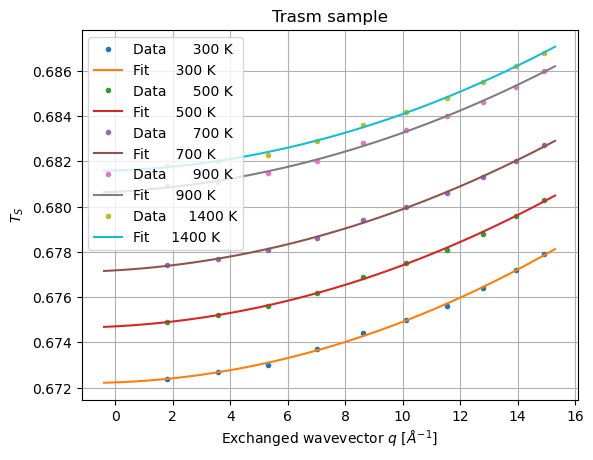

###### Vanadium #######
Fit to quadratic function aq^2+bq+c
a 5.1e-05 +/- 3e-06
b -0.00013 +/- 4e-05
c 0.7147 +/- 0.0002
Chi square 18.86172923905827


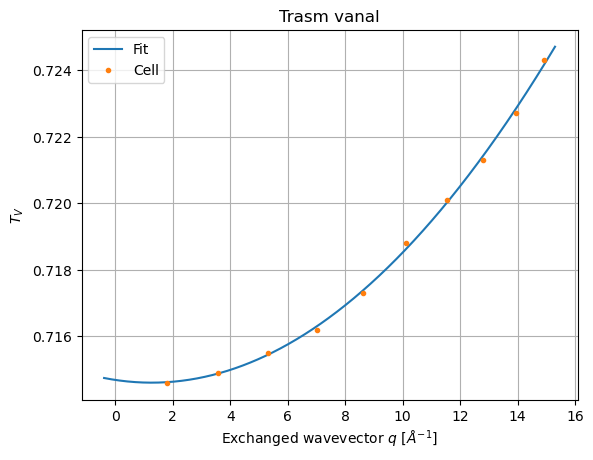

In [10]:
print('###### TRASM #####')
trasm_sample = read_dat_file('trasmsample')[1:6]
trasm_v = read_dat_file('trasmvana')[1]

err_ris = 1e-4/np.sqrt(12)*np.ones(np.size(q_gamma))

def quadratic(x,a,b,c):
    return a*x**2+b*x+c

def exp_decay(x,a,b,c):
    return a + b*np.exp(-2*x/c)


trasm_sample_fit = []

print('###### Sample #######')
for i in range(np.size(T)):
    print('##### %8.0f  K ######' % T[i])
    popt,pcov = curve_fit(quadratic,q_gamma,trasm_sample[i],sigma = err_ris)
    trasm_sample_fit.append(quadratic(q,*popt))
    chi_sq = np.sum((trasm_sample[i]-quadratic(q_gamma, *popt))**2/err_ris**2)/(np.size(trasm_sample[i])-3)   
    print('Fit to quadratic function aq^2+bq+c')
    par = my_round(popt,np.sqrt(np.diag(pcov)))
    print('a', par[0][0], '+/-', par[0][1])
    print('b', par[1][0], '+/-', par[1][1])
    print('c', par[2][0], '+/-', par[2][1])
    print('Chi square', chi_sq)
    plt.plot(q_gamma,trasm_sample[i], '.',label = 'Data %8.0f K' % T[i])
    plt.plot(q,trasm_sample_fit[i],label = 'Fit %8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'$T_S$')
plt.title('Trasm sample')
plt.grid()
plt.legend()
plt.show()

print('###### Vanadium #######')
popt,pcov = curve_fit(quadratic,q_gamma,trasm_v,sigma = err_ris)
trasm_v_fit=quadratic(q,*popt)
chi_sq = np.sum((trasm_v-quadratic(q_gamma, *popt))**2/err_ris**2)/(np.size(trasm_v)-3)
print('Fit to quadratic function aq^2+bq+c')
par = my_round(popt,np.sqrt(np.diag(pcov)))
print('a', par[0][0], '+/-', par[0][1])
print('b', par[1][0], '+/-', par[1][1])
print('c', par[2][0], '+/-', par[2][1])
print('Chi square', chi_sq)
plt.plot(q,trasm_v_fit,label = 'Fit')
plt.plot(q_gamma,trasm_v, '.',label = 'Cell')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'$T_V$')
plt.title('Trasm vanal')
plt.grid()
plt.legend()
plt.show()



And finally get S(q)

Number density GeO2 2.11e+22 atoms/cm^3


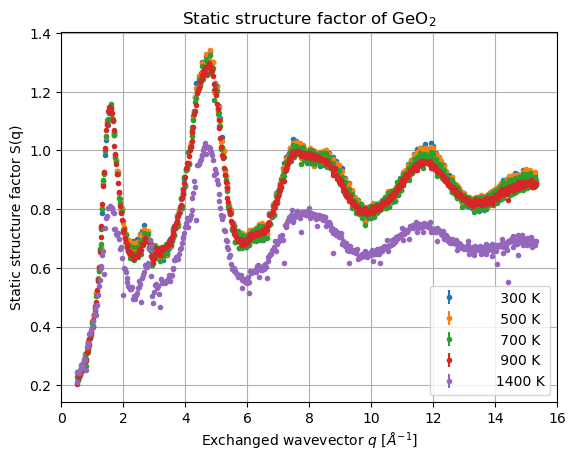

In [11]:
N = 6.022e23   #avogadro number
density_v = 6.099#11 # g/cm^3
aw_v = 50.9415   #g/mol
n_v = density_v*N/aw_v  # atoms/cm^3
density_geo2 = 3.66 #g/cm^3
aw_geo2 = 104.6388 #g/mol
n_geo2 = density_geo2*N/aw_geo2  # atoms/cm^3

print('Number density GeO2',round(n_geo2,-20),'atoms/cm^3')
density_geo2 = []
density_geo2.append(3.66*np.ones(len(q)))  #g/cm^3   capire sta densità
density_geo2.append(3.62*np.ones(len(q)))
density_geo2.append(3.587*np.ones(len(q)))
density_geo2.append(3.551*np.ones(len(q)))
density_geo2.append(3.46*np.ones(len(q)))

n_geo2 = np.array(density_geo2)*N/aw_geo2  # atoms/cm^3

density_v = []
density_v.append(6.099*np.ones(len(q)))  #g/cm^3   capire sta densità
density_v.append(6.067*np.ones(len(q)))
density_v.append(6.032*np.ones(len(q)))
density_v.append(5.994*np.ones(len(q)))
density_v.append(5.884*np.ones(len(q)))

n_v = np.array(density_v)*N/aw_v  # atoms/cm^3

sigma_v_inc = 5.08   # sigma_inc in barn
w_ge = 72.63/(72.63+16*2)
w_o = 16*2/(72.63+16*2)
sigma_geo2_coh = (8.42*w_ge+4.232*w_o)#in barn   weighted sum over mass fraction
sigma_geo2_inc = 0.18

sigma_geo2_coh = 8.42 + 2*4.232

ratio = sigma_v_inc*n_v/(n_geo2*sigma_geo2_coh)#*np.ones((np.size(T),np.size(q)))


Sdq = ratio*I_s*trasm_v_fit/(I_v*trasm_sample_fit) - sigma_geo2_inc/sigma_geo2_coh  #(w_ge*(8.42+0.18)+w_o*4.232)/(sigma_geo2_coh) 

err_Sdq = abs(Sdq)*np.sqrt((np.array(err_I_s)/np.array(I_s))**2+(np.array(err_I_v)/np.array(I_v))**2)

for i in range (np.size(T)):
        plt.errorbar(q[30:],Sdq[i][30:],fmt = '.', yerr = err_Sdq[i][30:],label = ' %8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel(r'Static structure factor S(q)')
plt.title(r'Static structure factor of GeO$_2$')
plt.xlim(0,16)
#plt.ylim(0,5)
plt.grid()
plt.legend()
plt.show()

Smooth data before doing inverse Fourier transform, to avoid ripples

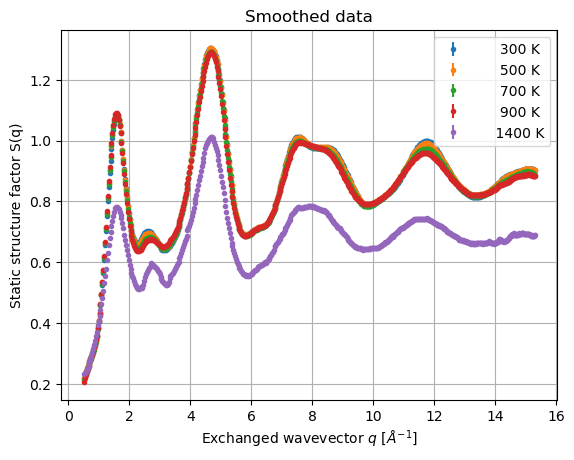

In [12]:
q_new = np.array(q[30:])

smoothed_data = []
err_smoothed_data = []

for i in range(np.size(T)):
    smooth = sci.signal.savgol_filter(Sdq[i][30:],30,3)
    smoothed_data.append(smooth)
    err_smoothed_data.append(err_Sdq[i][30:])
    plt.errorbar(q_new,smoothed_data[i], fmt = '.', yerr = err_smoothed_data[i] ,label = '%8.0f K' % T[i])
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Static structure factor S(q)')
plt.title('Smoothed data')
plt.grid()
plt.legend()
plt.show()


smooth the high q region with gaussian product

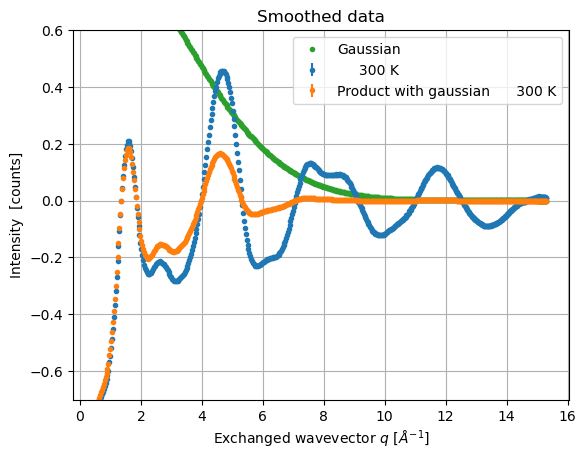

In [13]:
def gaussian(x, a, x0, sigma):
    """
    Gaussian function with amplitude a, mean x0, and standard deviation sigma.
    """
    return a * np.exp(-(x - x0)**2/ (2 * sigma**2))
width = 3.25
index = get_indices_in_range(q_new,7,16)
for i in range(1):
    smooth = (smoothed_data[i]/np.mean(smoothed_data[i][index])-1)*gaussian(q_new,1,0,width)
    plt.errorbar(q_new,smoothed_data[i]/np.mean(smoothed_data[i][index])-1, fmt = '.', yerr = err_smoothed_data[i] ,label = '%8.0f K' % T[i])
    plt.errorbar(q_new,smooth, fmt = '.', yerr = err_smoothed_data[i] ,label = 'Product with gaussian %8.0f K' % T[i])
plt.plot(q_new, gaussian(q_new,1,0,width),'.', label = 'Gaussian')
plt.xlabel(r'Exchanged wavevector $q$ [$Å^{-1}$]')
plt.ylabel('Intensity  [counts]')
plt.title('Smoothed data')
plt.ylim(-0.7,0.6)
plt.grid()
plt.legend()
plt.show()

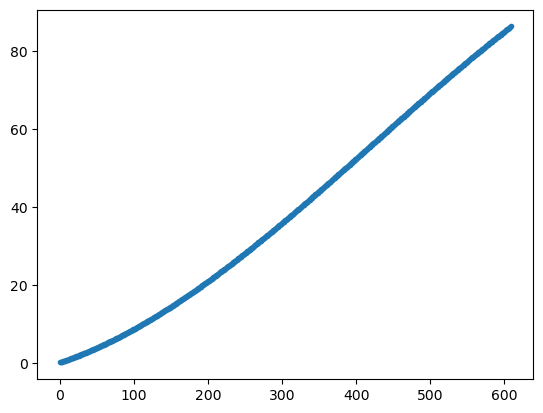

In [14]:
diff = np.zeros(np.size(q_new))
for i in range(len(q_new)-1):
    diff[i] = q_new[i+1]-q_new[i]
diff[len(q_new)-1] = diff[len(q_new)-2]
#plt.plot(q_new,diff,'.')ù
plt.plot(np.arange(0,len(q_new)),diff[::-1]/(max(q_new)*min(diff))*np.arange(1,np.size(q_new)+1),'.')
plt.show()

Invert fourier transform and get g(r)

0.06534238731184305


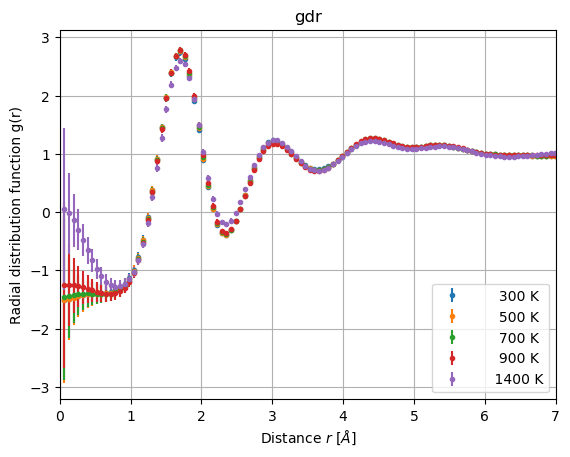

In [15]:
dr = 1/max(q_new)
r = dr*np.arange(1,np.size(q_new)+1) # in Angstrom
#r = dr*diff[::-1]/min(diff)*np.arange(1,np.size(q_new)+1)
print(dr)
index = get_indices_in_range(q_new,7,16)

gdr = []
err_gdr = []
width = 3.5
for i in range(len(T)):
    mean_data = np.mean(smoothed_data[i][index])
    err_mean_data = np.sqrt(np.sum(err_smoothed_data[i][index]**2))
    
    integral = np.zeros(np.size(r))
    for j in range(np.size(r)):
        integrand = (smoothed_data[i]/mean_data-1)*q_new*np.sin(q_new*r[j])*gaussian(q_new, 1, 0, width)   # multiply by a gaussian to reduce the bumps in high q range --> reduce ripples in low r regime
        integral[j] = sci.integrate.simpson(integrand,q_new)
  
    #deconv = sci.signal.deconvolve(np.array(integral),np.array(gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width)))[1] #deconvolve the gaussian
    funz = 1 + 1e24/(2*np.pi**2*r*n_geo2[i][0])*integral
    err_funz = 1e24*(q_new[1]-q_new[0])/(2*np.pi**2*r*n_geo2[i][0])*np.sqrt(np.sum((err_smoothed_data[i]/mean_data*q_new*np.sin(q_new*r)*gaussian(q_new, 1, 0, width))**2)+(err_mean_data/mean_data)**2*np.sum((smoothed_data[i]*q_new*np.sin(q_new*r)*gaussian(q_new, 1, 0, width))**2))
   
    gdr.append(funz)
    err_gdr.append(err_funz)

    plt.errorbar(r,funz, fmt = '.', yerr = err_funz ,label = '%8.0f K' % T[i])

    #plt.plot(r,funz, '.',label = '%8.0f K' % T[i])
#plt.plot(r,gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width), label = 'Gaussian')
plt.xlabel(r'Distance $r$ [$Å$]')
plt.ylabel('Radial distribution function g(r)')
plt.title('gdr')
plt.xlim(0,7)
plt.xscale('linear')
plt.grid()
plt.legend()
#plt.ylim(-0.5,3.5)
plt.show()

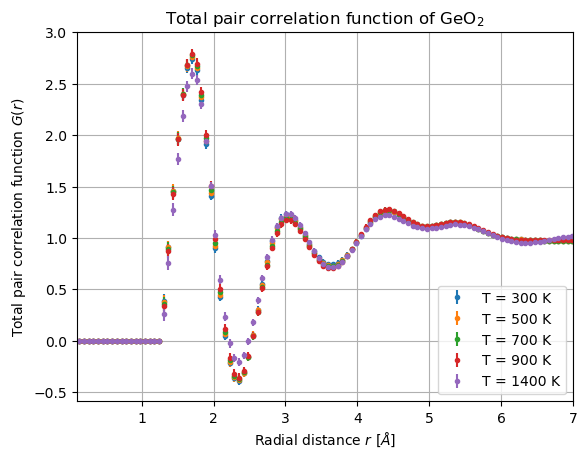

In [16]:
# need to do it automatic in next version with better gdr

low = 18

correction = np.zeros(low+1)
correction = np.append(correction,np.ones(len(r)-len(correction)))

correction_1400 = np.zeros(low+1)
correction_1400 = np.append(correction_1400,np.ones(len(r)-len(correction_1400)))

gdr[0:-1] = gdr[0:-1]*correction
err_gdr[0:-1] = err_gdr[0:-1]*correction

gdr[-1] = gdr[-1]*correction_1400
err_gdr[-1] = err_gdr[-1]*correction_1400

for i in range(len(T)):
    plt.errorbar(r,gdr[i], fmt = '.', yerr = err_gdr[i],label = 'T = %d K' %T[i])

plt.xlabel(r'Radial distance $r$ [$\AA$]')
plt.ylabel('Total pair correlation function $G(r)$')
plt.title(r'Total pair correlation function of GeO$_2$')
plt.xlim(0.1,7)
plt.grid()
plt.legend(loc='lower right')
plt.show()


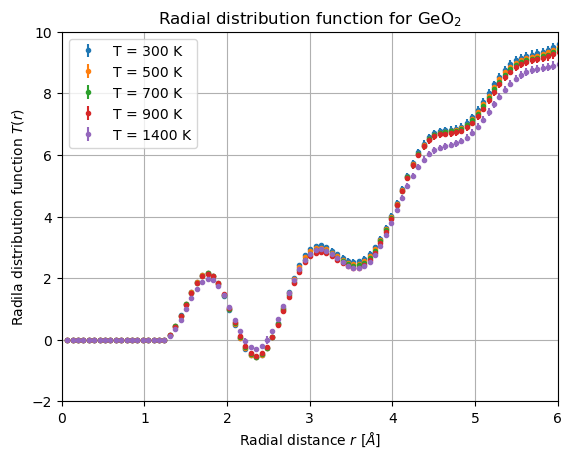

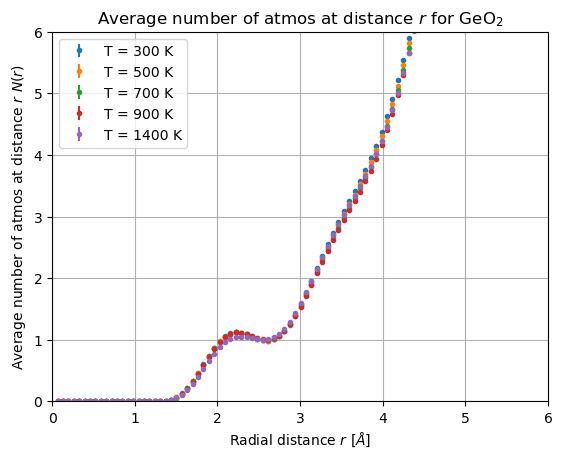

In [17]:
Tdr = [] 
err_Tdr = [] 

for i in range(len(T)):
    tdr = 4*np.pi*1e-24*n_geo2[i][30:]*r**2*gdr[i]
    err_tdr = abs(tdr)*np.sqrt((err_gdr[i]/(gdr[i]+0.01))**2)

    Tdr.append(tdr)
    err_Tdr.append(err_tdr)
    plt.errorbar(r,tdr, fmt = '.', yerr = err_tdr,label = 'T = %d K' %T[i])

plt.xlabel(r'Radial distance $r$ [$\AA$]')
plt.ylabel('Radila distribution function $T(r)$')
plt.title(r'Radial distribution function for GeO$_2$')
plt.xlim(0,6)
plt.ylim(-2,10)
plt.grid()
plt.legend(loc='upper left')
plt.show()


Ndr = []
err_Ndr = []

for j in range(len(T)):
    ndr = np.zeros(len(r))
    err_ndr = [0]
    for i in range (1,len(r)):
        ndr[i] = sci.integrate.simpson(Tdr[j][0:i], r[0:i])
        err_integrand = err_Tdr[j][0:i]
        err_ndr.append(4*np.pi*1e-24*n_geo2[j][30:]*(max(r)-min(r))/(3*(len(r)-1))*np.sqrt(abs(-3*err_integrand[0]**2-15*err_integrand[-1]**2+sum(4*err_integrand[::2]**2)+sum(16*err_integrand[1::2]**2))))

    Ndr.append(ndr)
    err_Ndr.append(err_ndr)
    plt.errorbar(r,ndr, fmt = '.', yerr = 0,label = 'T = %d K' %T[j])

plt.xlabel(r'Radial distance $r$ [$\AA$]')
plt.ylabel('Average number of atmos at distance $r$ $N(r)$')
plt.title(r'Average number of atmos at distance $r$ for GeO$_2$')
plt.xlim(0,6)
plt.ylim(0,6)
plt.grid()
plt.legend(loc='upper left')
plt.show()

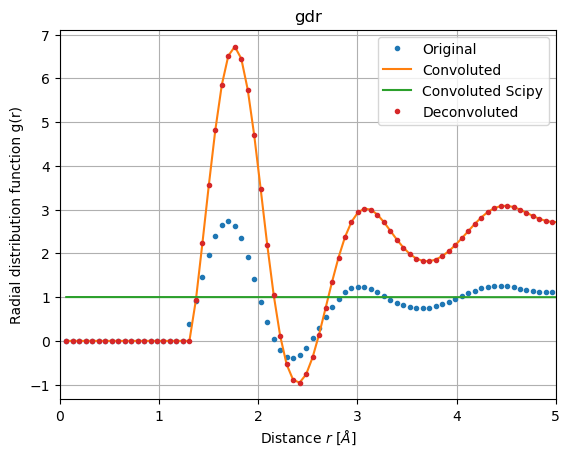

In [18]:
conv = np.zeros(len(r))
for i in range(len(r)):
    for j in range(0,i):
        conv[i] = gdr[0][j]*gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width)[i-j]

deconv = sci.signal.deconvolve(conv,np.array(gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width)))[1]


conv_sci = sci.signal.convolve(gdr[0], gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width),mode = 'same', method = 'direct')/sum(gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width))

plt.plot(r,gdr[0],'.',label = 'Original')
plt.plot(r,conv,'-', label = 'Convoluted')
plt.plot(r,conv_sci,'-', label = 'Convoluted Scipy')
plt.plot(r,deconv,'.', label = 'Deconvoluted')
#plt.plot(r,gaussian(r,(np.sqrt(width**2/(2*np.pi)))**3,0,1/width), label = 'Gaussian')
plt.xlabel(r'Distance $r$ [$Å$]')
plt.ylabel('Radial distribution function g(r)')
plt.title('gdr')
plt.xlim(0,5)
plt.xscale('linear')
plt.grid()
plt.legend()
#plt.ylim(0.8,1.2)
plt.show()
    

######## Expected values #########
Ge-O: 1.73 Å
O-O: 2.82 Å
Ge-Ge: 3.16 Å
################
######## T =      300  K ########


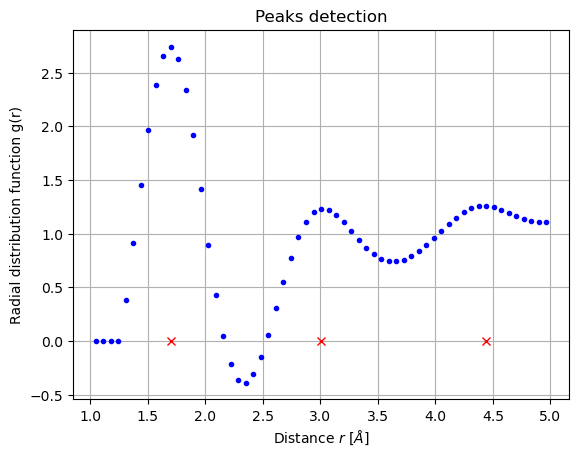

/home/simo/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma


ValueError: Residuals are not finite in the initial point.

In [19]:
peak_label = ['Ge-O', 'O-O', 'Ge-Ge']
gdr_peaks_tot = []
delta_gdr_peaks_tot = []  
height_gdr_peaks_tot = []
delta_height_gdr_peaks_tot = []

print('######## Expected values #########')
print('Ge-O: 1.73 Å')
print('O-O: 2.82 Å')
print('Ge-Ge: 3.16 Å')
print('################')

for i in range(len(T)):

    print('######## T = %8.0f  K ########' % T[i] )

    index = get_indices_in_range(r,1,5)
    shift = r[index]
    intensity = gdr[i][index]
    err_intensity = err_gdr[i][index]
    
    index_peaks = sci.signal.find_peaks(intensity,height=1,distance=10)[0]
    widths = sci.signal.peak_widths(intensity,index_peaks, rel_height=0.0035)[0]

    shift_peak= []
    intensity_peaks = []

    i=0
    while(i<index_peaks.size):
        shift_peak.append(shift[index_peaks[i]])
        intensity_peaks.append(intensity[index_peaks[i]])
        i=i+1

    larghezza_in_shift = widths*2
    #print(shift_peak,larghezza_in_shift)


    shift_peak = np.array(shift_peak) 

    plt.plot(shift,intensity,'.',color='blue')
    plt.plot(shift_peak,[0]*len(shift_peak),'x',color='red')
    plt.title('Peaks detection')
    plt.xlabel(r'Distance $r$ [$Å$]')
    plt.ylabel('Radial distribution function g(r)')
    plt.grid()
    plt.show()


    ranges = []
    for j in range(len(shift_peak)):
        shift_sup = shift_peak[j]+larghezza_in_shift[j]/2
        shift_inf = shift_peak[j]-larghezza_in_shift[j]/2
        coord = (shift_inf,shift_sup)
        ranges.append(coord)

    gdr_peaks = []
    delta_gdr_peaks = []  
    height_gdr_peaks = []
    delta_height_gdr_peaks = []

    ranges = [[1.2,2],[2.5,3.3],[4,4.75]]   #serve modo per automatizzare --> se fallisce il fit rifallo su più/meno punti finchè non viene
    i = 0
    for start, end in ranges:

        x_indices = get_indices_in_range(shift, start, end)
        first_peak_x = shift[x_indices]
        first_peak_y = intensity[x_indices]
        sigma =err_gdr[i][x_indices]

        p0 = [max(first_peak_y), np.mean(first_peak_x), 1]
        popt, pcov = curve_fit(gaussian,first_peak_x, first_peak_y,sigma=sigma,p0=p0,bounds=([min(first_peak_y),min(first_peak_x),0],[2*max(first_peak_y),max(first_peak_x),2*abs(max(first_peak_x)-min(first_peak_x))]),maxfev=80000)

        print( peak_label[i],'fit parameters')
        par = my_round(popt,np.sqrt(np.diag(pcov)))
        print('Peak position',par[1][0], '+/-', par[1][1],'Å')
        print('Peak height',par[0][0], '+/-', par[0][1])
    
        gdr_peaks.append(popt[1])
        height_gdr_peaks.append(popt[0])

        delta_gdr_peaks.append(np.sqrt(pcov[1][1]) )
        delta_height_gdr_peaks.append(np.sqrt(pcov[0][0]))
        i +=1
        x_plot = np.linspace(min(first_peak_x), max(first_peak_x),10000)
        plt.plot(x_plot, gaussian(x_plot, *popt),color='red')
        plt.errorbar(shift,intensity,yerr=err_intensity,fmt='.',color='blue')
    plt.title('Gaussian fit')
    plt.legend(['Fit', 'Data at T = %8.0f K' % T[i]])
    plt.xlabel(r'Distance $r$ [$Å$]')
    plt.ylabel('Radial distribution function g(r)')
    plt.show()

    gdr_peaks_tot.append(gdr_peaks)
    delta_gdr_peaks_tot.append(delta_gdr_peaks) 
    height_gdr_peaks_tot.append(height_gdr_peaks)
    delta_height_gdr_peaks_tot.append(delta_height_gdr_peaks)

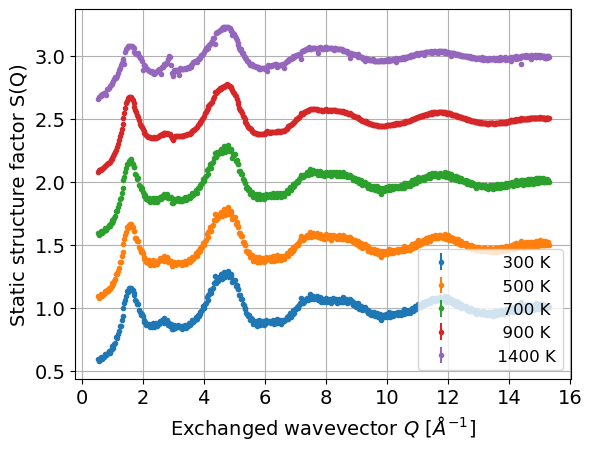

In [ ]:
index = get_indices_in_range(q_new,7,16)
for i in range (np.size(T)):
        plt.errorbar(q[30:],Sdq[i][30:]/np.mean(Sdq[i][index])+i/2,yerr = err_Sdq[i][30:], fmt ='.',label = ' %8.0f K' % T[i])

font1 = {'size':14}
plt.xlabel(r'Exchanged wavevector $Q$ [$Å^{-1}$]', fontdict = font1)
plt.ylabel(r'Static structure factor S(Q)', fontdict = font1)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.title(r'Static structure factor of GeO$_2$')
#plt.xlim(0,20)
#plt.ylim(0.75,3.75)
plt.grid()
plt.legend(loc = 'lower right',prop = {'size': 12})
plt.show()


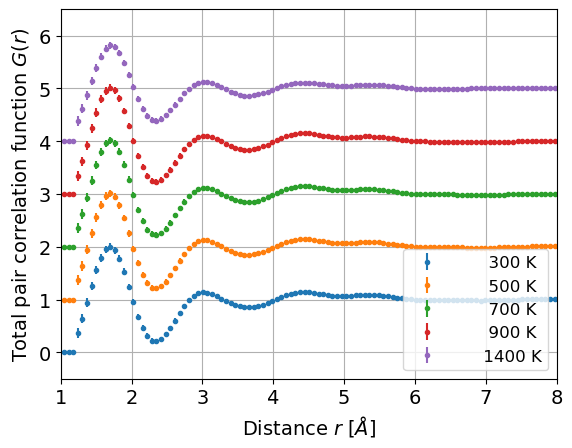

In [ ]:
#%matplotlib ipympl
index = get_indices_in_range(r,0,1.2)
zero = np.zeros(len(index))
one = np.ones(len(r)-len(index))
tot = np.append(zero,one)

for i in range (np.size(T)):
        plt.errorbar(r[0:],tot*gdr[i][0:]+i,yerr = tot*err_gdr[i][0:],fmt='.',label = ' %8.0f K' % T[i])
font1 = {'size':14}
plt.xlabel(r'Distance $r$ [$Å$]', fontdict = font1)
plt.ylabel(r'Total pair correlation function $G(r)$', fontdict = font1)
#plt.title(r'Static structure factor of GeO$_2$')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(1,8)
plt.ylim(-0.5,6.5)
plt.grid()
plt.legend(loc = 'lower right',prop = {'size': 12})
plt.show()